# Machine Learning Algorithms Testing

In [454]:
import os
import pandas as pd
from os import path
import numpy as np
from prettytable import PrettyTable     # https://pypi.org/project/prettytable/


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#LR libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#KNN libraries
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#RF libraries
# source - https://www.datacamp.com/tutorial/random-forests-classifier-python
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier

#SVM libraries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# DT
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Ensemble
from mlxtend.classifier import StackingClassifier

# https://seaborn.pydata.org/
import seaborn as sns
import matplotlib.pyplot as plt

In [455]:
path = os.getcwd()
text_features = pd.read_csv(path + "/book.csv")
text_features_header = list(text_features.columns)

text_features

,Unnamed: 0,Book Title,Word Count,Sentence Count,AVG Word Length,AVG Sentence Length,Total Syllables,MONOSYLL,POLYSYLL,NTR,VTR,TTR,Root TTR,Corrected TTR,BiLog TTR,LD,FWTR,MIN,MAX
0,0,Aginaldo,479,49,5.062630,9.775510,937,165,311,0.228013,0.086319,0.017915,0.443924,0.313902,0.373504,0.412052,0.052117,3,10
1,1,Alamat ng Lansones,512,52,5.154297,9.846154,1104,158,354,0.159322,0.161017,0.016949,0.411693,0.291111,0.360900,0.396610,0.030508,8,16
2,2,Andres Bonifacio - 1,610,21,5.860656,29.047619,1521,212,401,0.207207,0.120120,0.015015,0.387492,0.273998,0.354174,0.388889,0.054054,6,10
3,3,Ang Aklatang Pusa,958,72,5.385177,13.319444,2096,297,653,0.211796,0.112601,0.009830,0.328835,0.232521,0.341571,0.401251,0.020554,8,12
4,4,Ang Anghel ng Santa Ana,920,85,5.240217,10.905882,2018,320,606,0.172350,0.105069,0.010138,0.333947,0.236136,0.343079,0.413825,0.022120,8,12
5,5,Ang Ating mga Ninuno - 1,503,49,5.017893,10.265306,1073,164,339,0.219512,0.099303,0.019164,0.459131,0.324655,0.377465,0.395470,0.003484,6,10
6,6,Ang Ating mga Ninuno - 2,2054,130,5.014606,15.800000,4381,724,1329,0.218111,0.101001,0.004789,0.229516,0.162292,0.309831,0.400522,0.009142,11,16
7,7,Ang Batang Maraming Bawal,881,61,5.005675,14.557377,1843,330,556,0.136493,0.104265,0.010427,0.338662,0.239470,0.344461,0.366825,0.035071,6,12
8,8,Ang Biyoletang Tren_ Maglakbay sa Kaharian ng ...,142,14,5.619718,10.142857,280,72,70,0.324074,0.134259,0.037037,0.544331,0.384900,0.386853,0.486111,0.037037,3,10
9,9,Ang Dyip ni Mang Tomas,1260,89,5.112698,14.258427,2596,510,758,0.191316,0.099729,0.007463,0.286513,0.202595,0.328671,0.403664,0.015604,8,16


In [456]:
# fx generates prettytable instances

def gen_table(prediction, tests):

    data = []
    i = 0
    book_titles = tests

    for test in book_titles:
        unit = []
        unit.append(text_features.loc[test]['Book Title'])
        unit.append(prediction[i][0])
        unit.append(prediction[i][1])
        data.append(unit)
        i += 1

    table = PrettyTable()
    table.title = 'Test Predictions'
    table.field_names = ['Test Title', 'Min Age', 'Max Age']
    table.align['Test Title'] = 'l'
    
    for row in data:
        table.add_row(row)

    return table

In [457]:
# text_features = text_features.drop(columns=['Unnamed: 0'])

# corr = text_features.corr()

# np.fill_diagonal(corr.values, 0)
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, cmap=cmap, annot=True, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

# for _, spine in ax.spines.items():
#     spine.set_visible(True)

# plt.show()

In [458]:
X = text_features.drop(columns=['Book Title', 'MIN', 'MAX'])
y = text_features[['MIN', 'MAX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    6    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    10   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    8    |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    10   |
| Munting Sinag-araw                    

<Axes: >

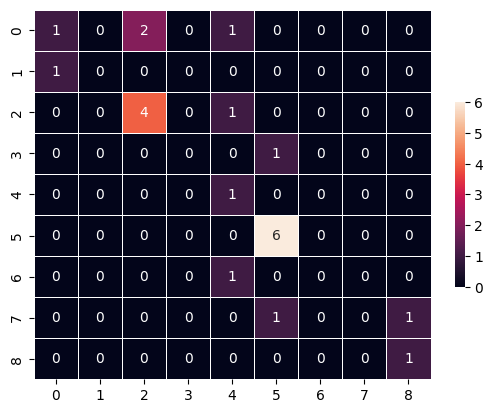

In [459]:
logreg = LogisticRegression(max_iter=1000, penalty='l2')
multi_logreg = MultiOutputClassifier(logreg)
multi_logreg.fit(X_train_scaled, y_train)

lr_pred = multi_logreg.predict(X_test_scaled)

print(gen_table(lr_pred, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
lr_accuracy = accuracy_score(y_test.values.ravel(), lr_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), lr_pred.ravel())
print("Accuracy:", lr_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### K-Nearest Neighbors

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    6    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    10   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    3    |    10   |
| Munting Sinag-araw                    

<Axes: >

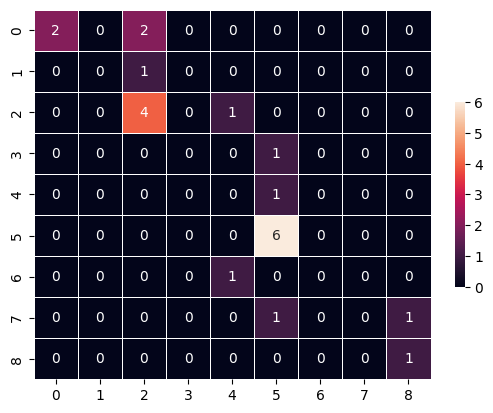

In [460]:
knn = KNeighborsClassifier(n_neighbors=5)

multi_output_knn = MultiOutputClassifier(knn)
multi_output_knn.fit(X_train_scaled, y_train)

knn_pred = multi_output_knn.predict(X_test_scaled)

print(gen_table(knn_pred, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
knn_accuracy = accuracy_score(y_test.values.ravel(), knn_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), knn_pred.ravel())
print("Accuracy:", knn_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# knn_pred = knn.predict(X_test_scaled)
# print("Predictions: ", knn_pred)

# accuracy = accuracy_score(y_test, knn_pred)
# conf_matrix = confusion_matrix(y_test, knn_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')

### Random Forest

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    3    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    12   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

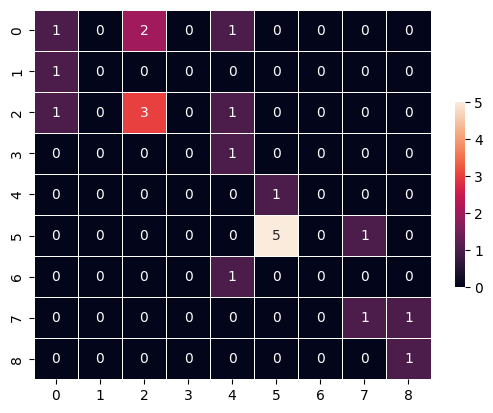

In [461]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_output_rf = MultiOutputClassifier(rf)
multi_output_rf.fit(X_train_scaled, y_train)

rf_pred = multi_output_rf.predict(X_test_scaled)

print(gen_table(rf_pred, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
rf_accuracy = accuracy_score(y_test.values.ravel(), rf_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), rf_pred.ravel())
print("Accuracy:", rf_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Support Vector Machine

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    12   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    6    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    16   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    8    |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    10   |
| Munting Sinag-araw                    

<Axes: >

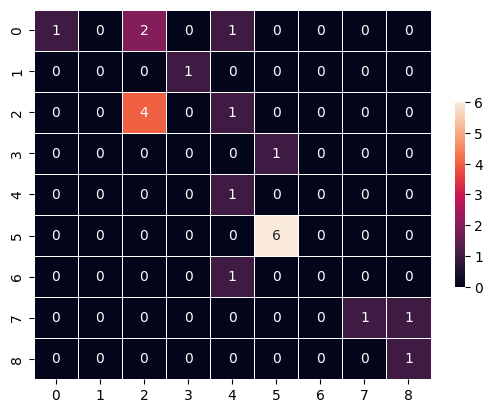

In [462]:
clf_svm = svm.SVC(kernel='linear')
multi_svm = MultiOutputClassifier(clf_svm)
multi_svm.fit(X_train_scaled, y_train)

svm_pred = multi_svm.predict(X_test_scaled)

print(gen_table(svm_pred, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
svm_accuracy = accuracy_score(y_test.values.ravel(), svm_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), svm_pred.ravel())
print("Accuracy:", svm_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Decision Trees

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    11   |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    7    |    8    |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    3    |    16   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    7    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

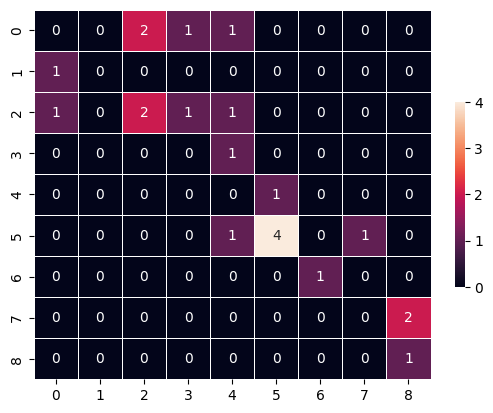

In [463]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=33)

multi_output_dt = MultiOutputClassifier(dt)
multi_output_dt.fit(X_train_scaled, y_train)

dt_pred = multi_output_dt.predict(X_test_scaled)

print(gen_table(dt_pred, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
dt_accuracy = accuracy_score(y_test.values.ravel(), dt_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), dt_pred.ravel())
print("Accuracy:", dt_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


## Ensemble Methods

Create meta-model

In [464]:
# used Stacking based on this source: https://www.geeksforgeeks.org/stacking-in-machine-learning-2/

meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

#### LR + SVM

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    6    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    10   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    8    |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

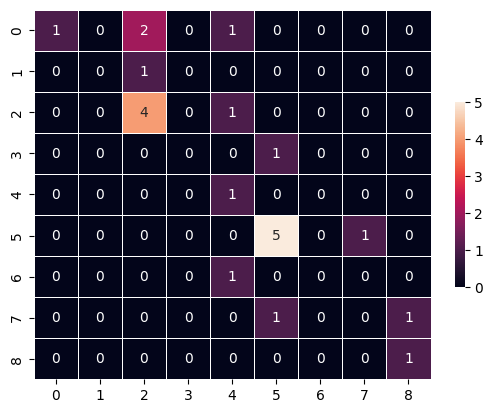

In [465]:
lr_svm_stack = StackingClassifier(classifiers =[multi_logreg, multi_svm], meta_classifier = meta_model)

model_stack = lr_svm_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
lr_svm_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", lr_svm_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### LR + KNN

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    6    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    10   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    8    |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    10   |
| Munting Sinag-araw                    

<Axes: >

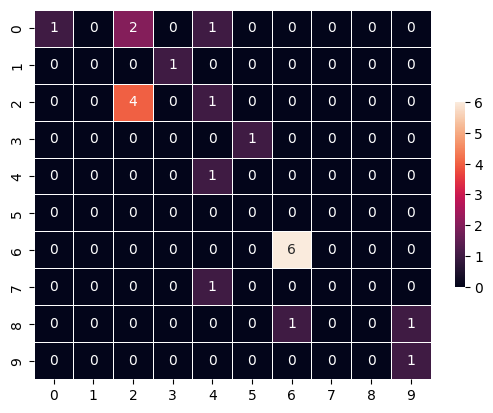

In [466]:
lr_knn_stack = StackingClassifier(classifiers =[multi_logreg, multi_output_knn], meta_classifier = meta_model)

model_stack = lr_knn_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
lr_knn_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", lr_knn_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### LR + RF

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    3    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    12   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

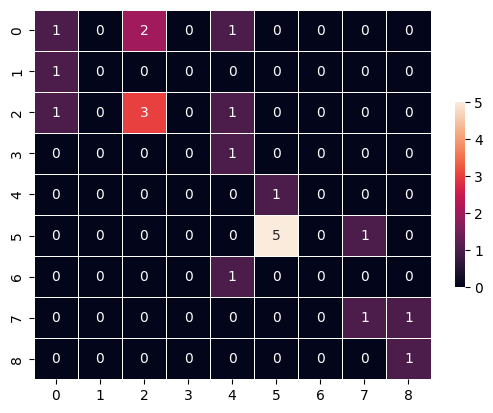

In [467]:
lr_rf_stack = StackingClassifier(classifiers =[multi_logreg, multi_output_rf], meta_classifier = meta_model)

model_stack = lr_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
lr_rf_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", lr_rf_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### SVM + KNN

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    6    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    12   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    8    |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

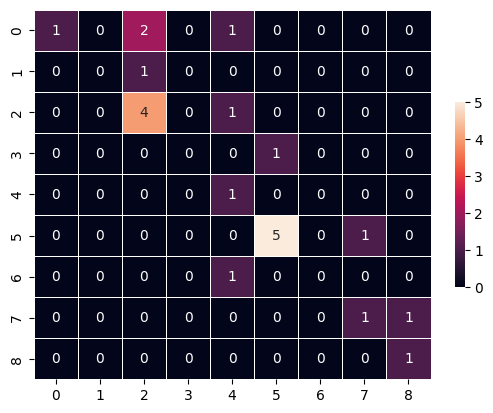

In [468]:
svm_knn_stack = StackingClassifier(classifiers =[multi_svm, multi_output_knn], meta_classifier = meta_model)

model_stack = svm_knn_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
svm_knn_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", svm_knn_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### SVM + RF

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    3    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    12   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

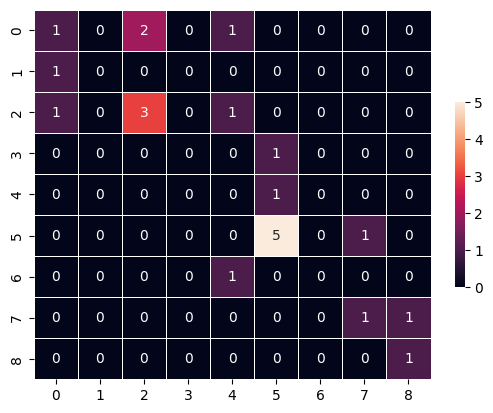

In [469]:
svm_rf_stack = StackingClassifier(classifiers =[multi_svm, multi_output_rf], meta_classifier = meta_model)

model_stack = svm_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
svm_rf_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", svm_rf_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### KNN + RF

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    3    |    10   |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    12   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

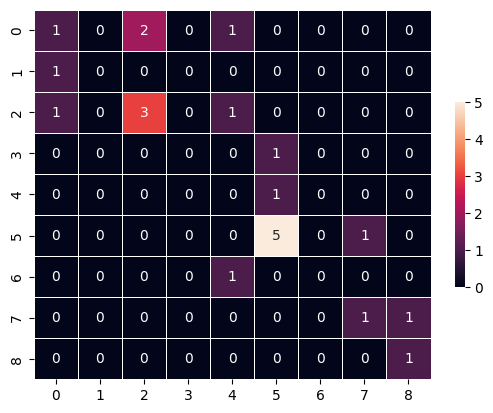

In [470]:
knn_rf_stack = StackingClassifier(classifiers =[multi_output_knn, multi_output_rf], meta_classifier = meta_model)

model_stack =   knn_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')

knn_rf_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", knn_rf_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### DT + LR

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    11   |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    7    |    8    |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    3    |    10   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    7    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

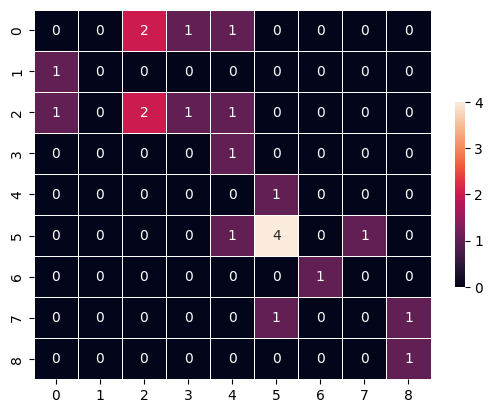

In [471]:
dt_lr_stack = StackingClassifier(classifiers =[multi_output_dt, multi_logreg], meta_classifier = meta_model)

model_stack = dt_lr_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')

dt_lr_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", dt_lr_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### DT + SVM

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    11   |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    7    |    8    |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    3    |    10   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    7    |    9    |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

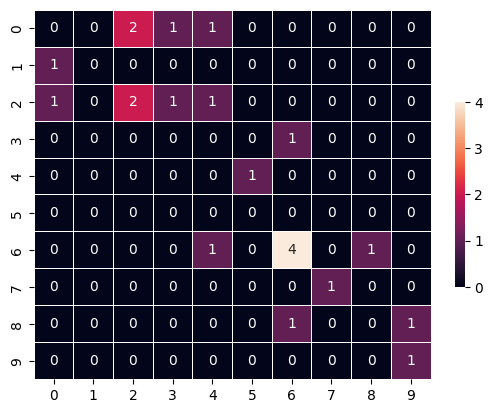

In [472]:
dt_svm_stack = StackingClassifier(classifiers =[multi_output_dt, multi_svm], meta_classifier = meta_model)

model_stack = dt_svm_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')

dt_svm_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", dt_svm_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### DT + KNN

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    11   |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    7    |    8    |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    3    |    10   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    6    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

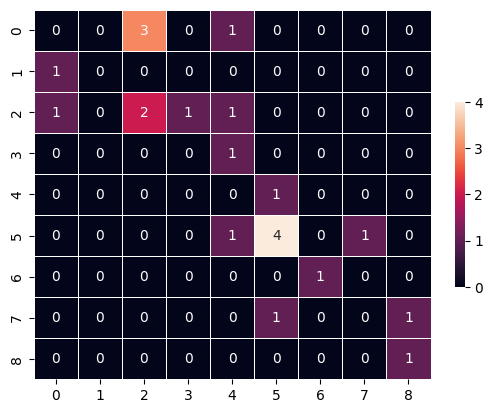

In [473]:
dt_knn_stack = StackingClassifier(classifiers =[multi_output_dt, multi_output_knn], meta_classifier = meta_model)

model_stack = dt_knn_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')

dt_knn_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", dt_knn_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### DT + RF

+-------------------------------------------------------------+
|                       Test Predictions                      |
+-----------------------------------------+---------+---------+
| Test Title                              | Min Age | Max Age |
+-----------------------------------------+---------+---------+
| Karapat-Dapat                           |    8    |    16   |
| Ang Ating mga Ninuno - 2                |    8    |    16   |
| Humadapnon                              |    6    |    10   |
| Jose Abad Santos (6-10)                 |    6    |    10   |
| Ang Ating mga Ninuno - 1                |    3    |    8    |
| Ibalon, Tatlong Bayani ng Epikong Bicol |    6    |    10   |
| Inang Kalikasans Bad Hair Day           |    6    |    10   |
| Islam (6-10)                            |    6    |    10   |
| Bahay-Bahayan                           |    3    |    10   |
| Ang Prinsipeng Ayaw Magsalita           |    8    |    12   |
| Munting Sinag-araw                    

<Axes: >

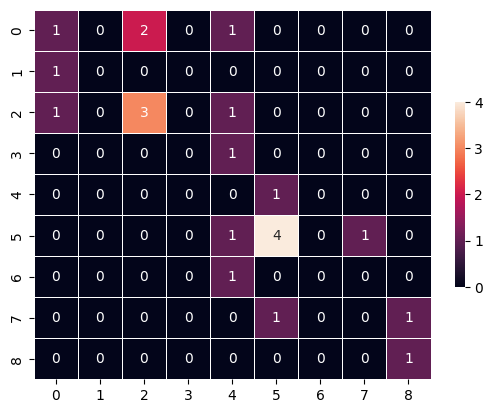

In [474]:
dt_rf_stack = StackingClassifier(classifiers =[multi_output_dt, multi_output_rf], meta_classifier = meta_model)

model_stack = dt_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)

print(gen_table(pred_stack, X_test.index))

print('-------------------------------------------------------------------------------------------------')
print('Statistics')
print('-------------------------------------------------------------------------------------------------')
dt_rf_accuracy = accuracy_score(y_test.values.ravel(), pred_stack.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), pred_stack.ravel())
print("Accuracy:", dt_rf_accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

sns.heatmap(conf_matrix, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Summary of Results

In [475]:
print(
    "LR: " + str(lr_accuracy) + "\n" +
    "KNN: " + str(knn_accuracy) + "\n" +
    "SVM: " + str(svm_accuracy) + "\n" +
    "RF: " + str(rf_accuracy) + "\n" +
    "DT: " + str(dt_accuracy) + "\n" +
    "LR + KNN: " + str(lr_knn_accuracy) + "\n" +
    "LR + SVM: " + str(lr_svm_accuracy) + "\n" +
    "LR + RF: " + str(lr_rf_accuracy) + "\n" +
    "LR + DT: " + str(dt_lr_accuracy) + "\n" +
    "SVM + KNN: " + str(svm_knn_accuracy) + "\n" +
    "SVM + RF: " + str(svm_rf_accuracy) + "\n" +
    "SVM + DT: " + str(dt_svm_accuracy) + "\n" +
    "KNN + RF: " + str(knn_rf_accuracy) + "\n" +
    "KNN + DT: " + str(dt_knn_accuracy) + "\n"+
    "RF + DT: " + str(dt_rf_accuracy)
)

LR: 0.5909090909090909
KNN: 0.5909090909090909
SVM: 0.6363636363636364
RF: 0.5
DT: 0.36363636363636365
LR + KNN: 0.5909090909090909
LR + SVM: 0.5454545454545454
LR + RF: 0.5
LR + DT: 0.36363636363636365
SVM + KNN: 0.5909090909090909
SVM + RF: 0.5
SVM + DT: 0.36363636363636365
KNN + RF: 0.5
KNN + DT: 0.36363636363636365
RF + DT: 0.4090909090909091
